# Cleaning Notebooks


In [1]:
# Imports and Environmental Setup

import sys
sys.path.insert(0, '..')

import matplotlib
%matplotlib inline

import ipywidgets 
import agglomerative

import os
import glob

import pandas as pd
import networkx as nx

from lineage import graphs, similarity

import clustering

In /home/suhail/anaconda3/envs/relic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/suhail/anaconda3/envs/relic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/suhail/anaconda3/envs/relic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
../lineage/similarity.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Load samples here
sample_df = pd.read_csv('20200218_sample.csv', header=None, index_col=0)
sample_df = sample_df.rename({1:'nb_name'}, axis=1)
sample_df.nb_name.values

array(['nb_668735.ipynb', 'nb_324400.ipynb', 'nb_423587.ipynb',
       'nb_292141.ipynb', 'nb_923025.ipynb', 'nb_1127960.ipynb',
       'nb_339588.ipynb', 'nb_391713.ipynb', 'nb_747796.ipynb',
       'nb_1201018.ipynb', 'nb_181931.ipynb', 'nb_75676.ipynb',
       'nb_1183746.ipynb', 'nb_1193283.ipynb', 'nb_1048957.ipynb',
       'nb_213583.ipynb', 'nb_705941.ipynb', 'nb_1252269.ipynb',
       'nb_180346.ipynb', 'nb_458180.ipynb'], dtype=object)

In [3]:
# Manually selected samples; 

sample_notebooks = ['nb_1172641.ipynb',
 'nb_120345.ipynb',
 'nb_264704.ipynb',
 'nb_28174.ipynb',
 'nb_292141.ipynb',
 'nb_315237.ipynb',
 'nb_339588.ipynb',
 'nb_417011.ipynb',
 'nb_422202.ipynb',
 'nb_442286.ipynb',
 'nb_458180.ipynb',
 'nb_495072.ipynb',
 'nb_814615.ipynb']


In [54]:
#Select Notebook
from IPython.display import IFrame, HTML

RESULT_DIR = '/home/suhail/Projects/sample_workflows/million_notebooks/selected/'
#RESULT_DIR = '/home/suhail/ok/'

#notebooks = sorted(sample_notebooks)

notebooks = sorted([d for d in os.listdir(RESULT_DIR) if os.path.isdir(os.path.join(RESULT_DIR, d))])
#notebooks = sample_df.nb_name.values

selected_nb = None
selected_graph = None

def get_notebook_result(result_dir, nb, filename='relic_agglomerative_result.csv'):
    return pd.read_csv(result_dir+'/'+nb+'/'+filename, index_col=0)

def display_notebook(notebook):
    url='https://flamingo.cs.uchicago.edu/jupyter/notebooks/'+RESULT_DIR.replace('/home/suhail/','')+notebook
    html='<a href="'+url+'" target="_blank">link</a>'
    print(url)
    g = graphs.get_graph(RESULT_DIR,notebook)
    graphs.draw_graph(g, canvas_size=(30,30))
    return g
    

def select_notebook(notebook):
    global selected_nb
    global selected_graph
    selected_nb = notebook
    selected_graph = display_notebook(notebook)
    display(get_notebook_result(RESULT_DIR, notebook))
    
metrics = ['cell','col', 'pc2cellcol', 'pc2colcell']

im = ipywidgets.interact_manual(select_notebook, notebook=notebooks, )




interactive(children=(Dropdown(description='notebook', options=('agri-mex', 'churn', 'githubviz', 'london-crim…

In [60]:
from collections import Counter
Counter([e[2]['operation'] for e in selected_graph.edges(data=True)])

Counter({'filter': 1, None: 2, 'merge': 2, 'isnull': 1})

In [59]:
def select_notebook_exp_graph(notebook, metric, weight):
    global selected_nb
    selected_nb = notebook
    display(draw_interactive_graph(RESULT_DIR, selected_nb, metric=metric, weight=weight).show(selected_nb+'.html'))

    
metrics = ['cell','col', 'pc2cellcol', 'pc2colcell', 'valset', 'rowvalset', 'colvalset', 'cellvalset', 'cell+group', 'cell+group+join', 'cell+join']
weights = ['cell_jaccard', 'col_jaccard', 'valset_jaccard', 'rowvalset_jaccard', 'colvalset_jaccard', 'cellvalset_jaccard']

im = ipywidgets.interact_manual(select_notebook_exp_graph, notebook=notebooks, metric=metrics, weight=weights)

interactive(children=(Dropdown(description='notebook', options=('agri-mex', 'churn', 'githubviz', 'london-crim…

In [34]:
selected_nb

'githubviz'

In [28]:
artifact_dir = RESULT_DIR+selected_nb+'/artifacts/'

selected_df = None

def get_notebook_artifact_list(nb):
    return [os.path.basename(x) for x in glob.glob(artifact_dir+'*.csv')]


dataframes = get_notebook_artifact_list(selected_nb)


def inspect_dataframe(df):
    global selected_df
    selected_df = pd.read_csv(artifact_dir+df, index_col=0)
    return selected_df

im = ipywidgets.interact_manual(inspect_dataframe, df=dataframes)


interactive(children=(Dropdown(description='df', options=('repo_users_reorder.csv', 'user-geocodes-dump.csv', …

In [8]:
selected_df.isnull().sum()

NameError: name 'selected_df' is not defined

In [29]:
selected_graph.edges()

OutEdgeView([('crimes.csv', 'crimesByMonth.csv'), ('crimes.csv', 'areaCrime.csv'), ('crimes.csv', 'crimeTypes.csv'), ('crimes.csv', 'typeLoc.csv'), ('crimes.csv', 'crimes__2.csv'), ('crimesByMonth.csv', 'crimesByMonth__1.csv'), ('crimesByMonth__1.csv', 'crimesByMonth__2.csv'), ('areaCrime.csv', 'areaCrime__1.csv'), ('areaCrime.csv', 'locationRecode__1.csv'), ('areaCrime__1.csv', 'areaCrime__2.csv'), ('typeLoc.csv', 'typeLoc__1.csv'), ('locationRecode__1.csv', 'typeLoc__1.csv'), ('typeLoc__1.csv', 'typeLoc__2.csv'), ('typeLoc__2.csv', 'typeLoc__3.csv'), ('crimes__2.csv', 'typeOutcome.csv'), ('typeOutcome.csv', 'typeOutcome__1.csv')])

In [30]:
add_edge_list = []

def add_edge(edge1, edge2, operation):
    global add_edge_list
    add_edge_list.append((edge1,edge2, operation))

im = ipywidgets.interact_manual(add_edge, edge1=dataframes, edge2=dataframes, operation='')

interactive(children=(Dropdown(description='edge1', options=('repo_users_reorder.csv', 'user-geocodes-dump.csv…

In [36]:
remove_edge_list = []

def remove_edge(edge1,edge2):
    global remove_edge_list
    remove_edge_list.append((edge1,edge2))

im = ipywidgets.interact_manual(remove_edge, edge1=dataframes, edge2=dataframes)

interactive(children=(Dropdown(description='edge1', options=('repo_users_reorder.csv', 'user-geocodes-dump.csv…

In [38]:
def remove_dataframe(df):
    global selected_graph
    g = selected_graph
    full_path = RESULT_DIR+selected_nb+'/artifacts/'+df
    if os.path.exists(full_path):
        #print(cell['links'])
        try:
            os.remove(full_path)
        except IsADirectoryError as e:
            pass
    
    if df in g.nodes():
        g.remove_node(df)
    
    selected_graph = g


im = ipywidgets.interact_manual(remove_dataframe, df=dataframes)

interactive(children=(Dropdown(description='df', options=('repo_users_reorder.csv', 'user-geocodes-dump.csv', …

In [39]:
selected_graph.edges()

OutEdgeView([('extract_user_repo.csv', 'repo_users.csv'), ('users_ren_col.csv', 'repo_users.csv'), ('user-geocodes-dump.csv', 'users_ren_col.csv'), ('repos-dump.csv', 'extract_user_repo.csv')])

In [40]:
remove_edge_list

[]

In [41]:
add_edge_list

[('repo_users.csv', 'repo_users_ranks.csv', 'sort')]

In [42]:
def create_custom_graph(add_edge_list, remove_edge_list):
    global selected_graph
    g = selected_graph
    for e1,e2 in remove_edge_list:
        try:
            g.remove_edge(e1,e2)
        except nx.NetworkXError as e:
            g.remove_edge(e2,e1)
    for e1,e2, op in add_edge_list:
        g.add_edge(e1,e2, operation=op)

    return g

def write_graph_file(g, selected_nb):
    outfile = RESULT_DIR+selected_nb+'/'+selected_nb+'_gt_fixed.pkl'
    nx.write_gpickle(g, outfile)


In [43]:
g = create_custom_graph(add_edge_list, remove_edge_list)
g.edges(data=True)

OutEdgeDataView([('extract_user_repo.csv', 'repo_users.csv', {'operation': 'merge'}), ('users_ren_col.csv', 'repo_users.csv', {'operation': 'merge'}), ('repo_users.csv', 'repo_users_ranks.csv', {'operation': 'sort'}), ('user-geocodes-dump.csv', 'users_ren_col.csv', {'operation': 'rename column'}), ('repos-dump.csv', 'extract_user_repo.csv', {'operation': 'new derived column'})])

In [44]:
write_graph_file(g,selected_nb)

In [40]:
result, im_frames = agglomerative.lineage_inference_agglomerative(base_dir=RESULT_DIR, nb_name=selected_nb, 
                                                                      pre_cluster='PC2',
                                                                 intra_cell_threshold=0.0001,
                                                                 inter_cell_threshold=0.0001, draw=True)

Processing: nb_705941.ipynb


Finished adding all intra-cluster edges


Breaking Tie for cell-level: [('wkd_cas_mean.csv', 'wkd_reg_mean.csv', 0.3333333333333333), ('wtr_reg_mean.csv', 'wtr_cas_mean.csv', 0.3333333333333333), ('hdy_reg_mean.csv', 'hdy_cas_mean.csv', 0.3333333333333333)]
Adding edge wkd_cas_mean.csv wkd_reg_mean.csv 0.3333333333333333


Breaking Tie for cell-level: [('wtr_reg_mean.csv', 'wtr_cas_mean.csv', 0.3333333333333333), ('hdy_reg_mean.csv', 'hdy_cas_mean.csv', 0.3333333333333333)]
Adding edge wtr_reg_mean.csv wtr_cas_mean.csv 0.3333333333333333


Adding edge hdy_reg_mean.csv hdy_cas_mean.csv 0.3333333333333333


Breaking Tie for cell-level: [('wkd_cas_mean.csv', 'wtr_cas_mean.csv', 0.10714285714285714), ('wkd_reg_mean.csv', 'wtr_reg_mean.csv', 0.10714285714285714)]
Multiple Overlap candidates:  [('wkd_cas_mean.csv', 'wtr_cas_mean.csv', 0), ('wkd_reg_mean.csv', 'wtr_reg_mean.csv', 0)]
Adding edge wkd_reg_mean.csv wtr_reg_mean.csv 0.10714285714285714


Breaking Tie for cell-level: [('wkd_cas_mean.csv', 'hdy_cas_mean.csv', 0.07142857142857142), ('wkd_reg_mean.csv', 'hdy_reg_mean.csv', 0.07142857142857142)]
Multiple Overlap candidates:  [('wkd_cas_mean.csv', 'hdy_cas_mean.csv', 0), ('wkd_reg_mean.csv', 'hdy_reg_mean.csv', 0)]
Adding edge wkd_reg_mean.csv hdy_reg_mean.csv 0.07142857142857142


Breaking Tie for cell-level: [('hdy_reg_mean.csv', 'days.csv', 0.03337893296853625), ('hdy_cas_mean.csv', 'days.csv', 0.03337893296853625)]
Multiple Overlap candidates:  [('hdy_reg_mean.csv', 'days.csv', 1), ('hdy_cas_mean.csv', 'days.csv', 1)]
Adding edge hdy_cas_mean.csv days.csv 0.03337893296853625


<Figure size 3600x3600 with 0 Axes>

In [41]:
result

,nb_name,rows,columns,artifacts,index,numclusters,distance_metric,edges_correct,edges_missing,edges_to_remove,join_edges,precision,recall,F1,missing_files,time,pre_cluster
0,nb_705941.ipynb,731,16,7,False,7,cell_mst,0,6,0,NaN,0.000000,0.000000,0.000000,0,1.437053,PC2
1,nb_705941.ipynb,731,16,7,False,7,cell_mst,0,6,1,NaN,0.000000,0.000000,0.000000,0,4.272968,PC2
2,nb_705941.ipynb,731,16,7,False,7,cell_mst,0,6,2,NaN,0.000000,0.000000,0.000000,0,6.938071,PC2
3,nb_705941.ipynb,731,16,7,False,7,cell_mst,0,6,3,NaN,0.000000,0.000000,0.000000,0,9.556713,PC2
4,nb_705941.ipynb,731,16,7,False,7,cell_mst,0,6,4,NaN,0.000000,0.000000,0.000000,0,12.092870,PC2
5,nb_705941.ipynb,731,16,7,False,7,cell_mst,0,6,5,NaN,0.000000,0.000000,0.000000,0,14.621837,PC2
6,nb_705941.ipynb,731,16,7,False,7,cell_mst,1,5,5,NaN,0.166667,0.166667,0.166667,0,17.107012,PC2


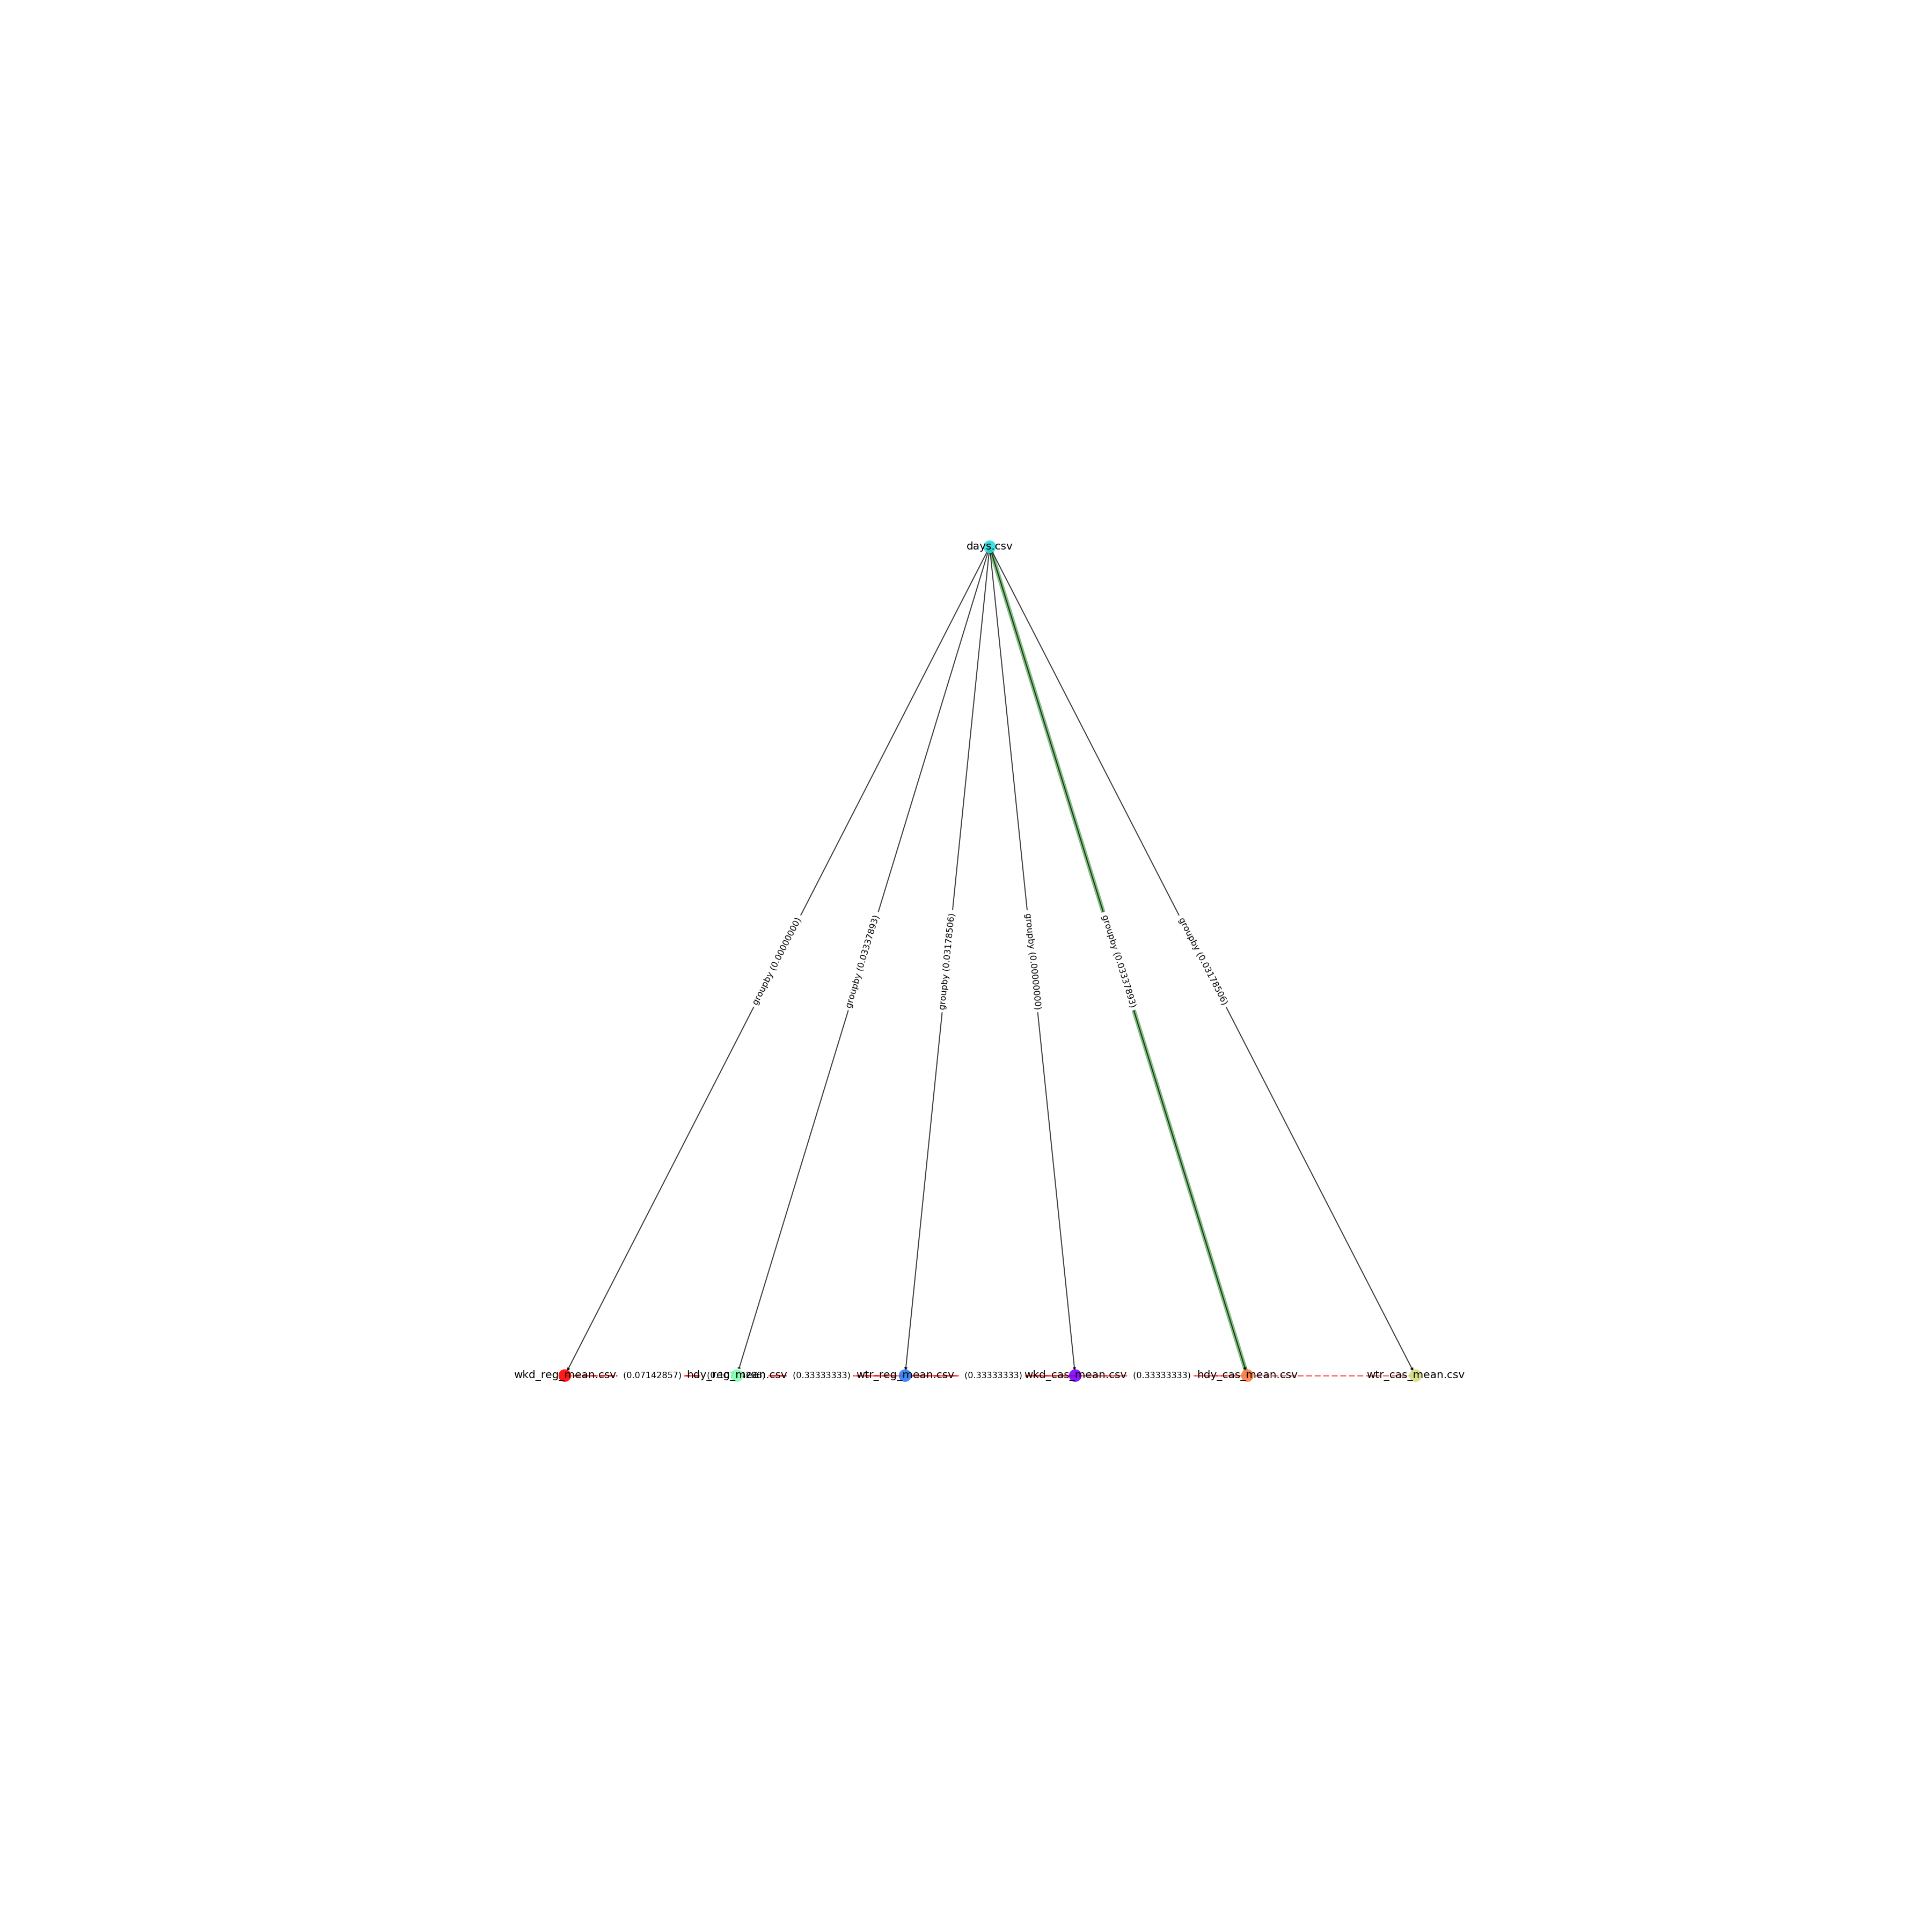

In [42]:
im_frames[-1]

In [10]:
import numpy as np
import itertools
from tqdm.autonotebook import tqdm

def common_columns(df1,df2):
    return set(df1).intersection(set(df2))

def get_col_valset(df):
    for col in set(df):
        yield col, set(df[col].values)

def compute_df_pair_features(df1,df2, df1_value_set_dict=None, df2_value_set_dict=None):
    common_cols = set(df1).intersection(set(df2))
    
    if not df1_value_set_dict:
        df1_value_set_dict = {name:valset for name, valset in get_col_valset(df1)}
    if not df2_value_set_dict:
        df2_value_set_dict = {name:valset for name, valset in get_col_valset(df2)}
    
    cell_jaccard = similarity.compute_jaccard_DF(df1,df2)
    col_jaccard = similarity.compute_col_jaccard_DF(df1,df2) #TODO: Use value set
    valset_jaccard  = similarity.compute_valset_similarity(df1,df2)
    ivalset_jaccard  = similarity.compute_indexed_valset_similarity(df1,df2)
    colvalset_jaccard  = similarity.compute_indexed_colvalset_similarity(df1,df2)
    cellvalset_jaccard  = similarity.compute_indexed_cellvalset_similarity(df1,df2)
    
    containment_scores  = [similarity.set_max_containment(df1_value_set_dict[col], 
                                                          df2_value_set_dict[col]) for col in common_cols]
    
    #Uniqueness computation
    unique_cols = 0
    contraction_ratios = []
    for col in common_cols:
        rows_not_equal = len(df1[col].values) != len(df2[col].values)
        df1_unique = len(df1_value_set_dict[col]) == len(df1[col])
        df2_unique = len(df2_value_set_dict[col]) == len(df2[col])
        
        df1_subset = df1_value_set_dict[col].issubset(df2_value_set_dict[col])
        df2_subset = df2_value_set_dict[col].issubset(df1_value_set_dict[col])
        
        if rows_not_equal and (df1_unique or df2_unique) and (df1_subset or df2_subset):
            unique_cols += 1
            numerator, denominator = max(len(df1[col]), len(df2[col])), min(len(df1[col]), len(df2[col]))
            contraction_ratios.append(numerator/denominator)
    
    result = {
        'common_cols' : len(common_cols),
        'cell_jaccard' : cell_jaccard,
        'col_jaccard' : col_jaccard,
        'valset_jaccard' : valset_jaccard,
        'rowvalset_jaccard' : ivalset_jaccard,
        'colvalset_jaccard': colvalset_jaccard,
        'cellvalset_jaccard': cellvalset_jaccard,
        'unique_cols': unique_cols,
    }
    
    if containment_scores:
        result.update({
            'max_containment' : max(containment_scores),
            'avg_containment' : np.average(containment_scores),
            'min_containment' : min(containment_scores),
        })
        
    if contraction_ratios:
        result.update({
            'max_contraction' : max(contraction_ratios),
            'avg_contraction' : np.average(contraction_ratios),
            'min_contraction' : min(contraction_ratios), 
        })
        
    
    return result

def get_all_node_pair_scores(dataset, gt_graph):
    pairwise_scores = []
    pairs = list(itertools.combinations(dataset.keys(), 2))
    df_value_dicts = {}
    for d1, d2 in tqdm(pairs, desc='graph pairs', leave=False):
        if d1 not in df_value_dicts.keys():
            df_value_dicts[d1] = {name:valset for name, valset in get_col_valset(dataset[d1])}
        if d2 not in df_value_dicts.keys():
            df_value_dicts[d2] = {name:valset for name, valset in get_col_valset(dataset[d2])}
        
        result = compute_df_pair_features(dataset[d1], dataset[d2], df1_value_set_dict=df_value_dicts[d1], 
                                          df2_value_set_dict=df_value_dicts[d2])
        
        gt = False
        
        if gt_graph.has_edge(d1, d2):
            result['operation'] = gt_graph[d1][d2]['operation']
            result['source'] = d1
            result['dest'] = d2
            gt=True
        elif gt_graph.has_edge(d2, d1):
            result['operation'] = gt_graph[d2][d1]['operation']
            result['source'] = d2
            result['dest'] = d1
            gt=True
        else:
            result['source'] = d1
            result['dest'] = d2
            gt=False
     
        result['ground_truth'] = gt
        pairwise_scores.append(result)

    return pairwise_scores

In [11]:
def compare_dataframes(df1, df2):
    selected_df1 = pd.read_csv(artifact_dir+df1, index_col=0)
    selected_df2 = pd.read_csv(artifact_dir+df2, index_col=0)
    display(selected_df1.head())
    display(selected_df2.head())
    print(compute_df_pair_features(selected_df1,selected_df2))

im = ipywidgets.interact_manual(compare_dataframes, df1=dataframes, df2=dataframes)

NameError: name 'dataframes' is not defined

In [15]:
from pyvis.network import Network
import pandas as pd
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt

def get_edge_color(e1,e2, g_truth, g_inferred):
    in_g_truth = False
    in_inferred = False
    if g_truth.has_edge(e1,e2) or g_truth.has_edge(e2,e1):
        in_g_truth = True
    if g_inferred.has_edge(e1,e2) or g_inferred.has_edge(e2,e1):
        in_inferred = True
        
    if in_g_truth and in_inferred:
        return 'green'
    elif in_inferred: 
        return 'red'
    elif in_g_truth:
        return 'black'
    else:
        return '#D3D3D3'

def draw_interactive_graph(RESULT_DIR, selected_nb, metric='cell', weight='cell_jaccard', cached=True):
    # , bgcolor="#222222", font_color="white",
    nb_net = Network(height="750px", width="100%",  notebook=True)

    g = graphs.get_graph(RESULT_DIR, selected_nb)
    g_inferred = graphs.get_graph_edge_list(RESULT_DIR, selected_nb, metric)
    df_dict = similarity.load_dataset_dir(RESULT_DIR+selected_nb+'/artifacts/', '*.csv', index_col=0)

    if os.path.exists(RESULT_DIR+selected_nb+'/pairwise_metrics.csv') and cached:
        nb_data = pd.read_csv(RESULT_DIR+selected_nb+'/pairwise_metrics.csv', index_col=0)
    else:
        nb_data = pd.DataFrame(get_all_node_pair_scores(df_dict, g))
    
    #print(df_dict)


    if '0.csv' not in df_dict:
        try:
            root_node = [x for x in nx.topological_sort(g)][0] #TODO: Check more than one root issues
        except nx.exception.NetworkXUnfeasible as e:
            print("ERROR: Cycle in Graph")
            root_node = list(df_dict.keys())[0]
            pass
    else:
        root_node = '0.csv'

    pos = graphviz_layout(g, root=root_node, prog='dot')

    # Cluster Coloring
    cluster_dict = clustering.get_graph_clusters(RESULT_DIR+selected_nb+'/inferred/'+'clusters_with_filename.csv')

    cmap = plt.cm.Dark2(np.linspace(0,1,len(set(cluster_dict.values()))))
    node_color = {e: to_hex(cmap[cluster_dict[e]]) for e in g.nodes()}
    
    sources = nb_data['source']
    targets = nb_data['dest']
    weights = nb_data[weight]

    edge_data = zip(sources, targets, weights)

    for e in edge_data:
        src = e[0]
        dst = e[1]
        w = e[2]

        # Edge Coloring
        edge_color = get_edge_color(e[0],e[1], g, g_inferred)
        
        edge_number = get_edge_number(e[0],e[1],g_inferred)

        hover_dict = nb_data.loc[(nb_data.source == src) & (nb_data.dest == dst)].to_dict('records')[0]
        hover_string = "<br>".join([str(k)+" : "+str(v) for k,v in hover_dict.items()])
        
        

        src_node_hover_html = df_dict[src].head().to_html() + "<br> Rows:"+ str(len(df_dict[src])) + " Columns:" + str(len(set(df_dict[src])))
        dst_node_hover_html = df_dict[dst].head().to_html() + "<br> Rows:"+ str(len(df_dict[dst])) + " Columns:" + str(len(set(df_dict[dst])))
        nb_net.add_node(src, src, x=pos[src][0], y=pos[src][1], physics=False, title=src_node_hover_html, color=node_color[src])
        nb_net.add_node(dst, dst, x=pos[dst][0], y=pos[dst][1], physics=False, title=dst_node_hover_html, color=node_color[dst])

        # Edge Coloring
        if edge_number is not None:
            nb_net.add_edge(src, dst, value=w, title=hover_string, physics=False, color=edge_color, label=edge_number)
        else:
            nb_net.add_edge(src, dst, value=w, title=hover_string, physics=False, color=edge_color)


    return nb_net
    


In [13]:
g_inferred = graphs.get_graph_edge_list(RESULT_DIR,selected_nb,'pc2cellcol')
g_inferred.edges(data=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/suhail/Projects/sample_workflows/million_notebooks/selected/london-crime/inferred/infered_mst_pc2cellcol.csv'

In [14]:
def get_edge_number(e1,e2, g_inferred):
    if g_inferred.has_edge(e1,e2) and 'num' in g_inferred[e1][e2]:
        return g_inferred[e1][e2]['num']
    elif g_inferred.has_edge(e2,e1) and 'num' in g_inferred[e2][e1]:
        return g_inferred[e2][e1]['num']
    return None
   

In [10]:
cluster_dict = clustering.get_graph_clusters(RESULT_DIR+selected_nb+'/inferred/'+'clusters_with_filename.csv')
cluster_dict

TypeError: can only concatenate str (not "NoneType") to str

In [11]:
df_dict = similarity.load_dataset_dir(RESULT_DIR+selected_nb+'/artifacts/', '*.csv', index_col=0)
df_dict.keys()

TypeError: can only concatenate str (not "NoneType") to str

In [12]:
def compute_col_jaccard_DF(df1,df2):

    # Empty DF check

    # fill NaN values in df1, df2 to some token val
    df1 = df1.fillna('jac_tmp_NA')
    df2 = df2.fillna('jac_tmp_NA')
    
    if df1.index.name or len(set(df.index):
        print("df1 reset")
        df1 = df1.reset_index()
    if df2.index.name:
        print("df2 reset")
        df2 = df2.reset_index()

    common_cols = set(df1).intersection(set(df2))

    if(len(common_cols) == 0):
        return 0.0


    common_cols_jaccard = []

    # Check common cols and print True/False
    for col in common_cols:
        try:
            common_cols_jaccard.append(similarity.set_jaccard_similarity(set(df1[col].values), set(df2[col].values)))
        except Exception as e:
            print(col)
            print(similarity.set_jaccard_similarity(set(df1[col].values), set(df2[col].values)))
            raise e

    # return np.average(common_cols_jaccard)
    return np.sum(common_cols_jaccard) / len(set(df1).union(set(df2)))

SyntaxError: invalid syntax (<ipython-input-12-822e1ca1e71b>, line 9)

In [7]:
df_dict = similarity.load_dataset_dir(RESULT_DIR+selected_nb+'/artifacts/', '*.csv', index_col=0)


In [27]:
def compute_jaccard_DF(df1,df2, pk_col_name=None, reindex=True, column_match=True):

    # fill NaN values in df1, df2 to some token val
    df1 = df1.fillna('jac_tmp_NA')
    df2 = df2.fillna('jac_tmp_NA')

    try:
        df3 = df1.merge(df2, how='outer', left_index=True, right_index=True, suffixes=['_jac_tmp_1','_jac_tmp_2'])
    except TypeError as e:
        # print("Can't Merge")
        return 0

    # Get set of column column names:
    comparison_cols = set(col for col in df3.columns if'_jac_tmp_' in str(col))
    common_cols = set(col.split('_jac_tmp_',1)[0] for col in comparison_cols)

    if(len(common_cols) == 0):
        return 0

    # Get set of non-common columns:
    uniq_cols = set(col for col in df3.columns if'_jac_tmp_' not in str(col))
    if(pk_col_name):
        uniq_cols.remove(pk_col_name)

    # Check common cols and print True/False
    for col in common_cols:
        left = col+'_jac_tmp_1'
        right = col+'_jac_tmp_2'
        df3[col] = df3[left] == df3[right]

    # Unique columns are already false
    for col in uniq_cols:
        df3[col] = False

    #Drop superflous columns
    df3 = df3.drop(columns=comparison_cols)
    if(pk_col_name):
        df3 = df3.drop(columns=[pk_col_name])

    # Compute Jaccard Similarity
    #intersection = np.sum(np.sum(df3))
    #union = df3.size
    return df3 #float(intersection) / union


In [28]:
compute_jaccard_DF(df_dict['oppose.csv'], df_dict['noncacontribs.csv'], column_match=True)

,contributor_firstname,ocd_prop_id,ccdc_prop_id,contributor_city,committee_name_x,prop_name,committee_position,contributor_state,committee_name_y,calaccess_prop_id,amount,calaccess_filing_id,contributor_zip,contributor_lastname,date_received,contributor_is_self_employed,contributor_occupation,ccdc_committee_id,calaccess_committee_id,contributor_employer
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
52,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
57,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
similarity.compute_indexed_cellvalset_similarity(df_dict['oppose.csv'], df_dict['noncacontribs.csv'])

0.06897942718838242

In [32]:
similarity.compute_jaccard_DF(df_dict['oppose.csv'], df_dict['noncacontribs.csv'],reindex=False)

0.06923076923076923

In [ ]:
similarity

In [90]:
similarity.compute_col_jaccard_DF(df_dict['df.csv'], df_dict['gp1.csv'])

KeyError: 'df.csv'

In [69]:
set(df_dict['df.csv'].index)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [10]:
df_dict.keys()

NameError: name 'df_dict' is not defined

In [96]:
test_df=df_dict['crimes.csv']
set(test_df.Area.values)

{'Adur',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Basildon',
 'Bassetlaw',
 'Bedford',
 'Bexley',
 'Birmingham',
 'Blackpool',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Brent',
 'Brentwood',
 'Brighton and Hove',
 'Bristol',
 'Broadland',
 'Bromley',
 'Broxbourne',
 'Cambridge',
 'Camden',
 'Canterbury',
 'Central Bedfordshire',
 'Chelmsford',
 'Cheltenham',
 'Cheshire East',
 'Cheshire West and Chester',
 'Chiltern',
 'City of London',
 'Colchester',
 'Corby',
 'Cornwall',
 'Cotswold',
 'County Durham',
 'Coventry',
 'Crawley',
 'Croydon',
 'Dacorum',
 'Darlington',
 'Dartford',
 'Ealing',
 'East Devon',
 'East Dorset',
 'East Hertfordshire',
 'East Northamptonshire',
 'Eastbourne',
 'Elmbridge',
 'Enfield',
 'Epping Forest',
 'Epsom and Ewell',
 'Fareham',
 'Fylde',
 'Gravesham',
 'Greenwich',
 'Guildford',
 'Hackney',
 'Hammersmith and Fulham',
 'Harborough',
 'Haringey',
 'Harlow',
 'Harrow',
 'Hastings',
 'Havering',
 'Herefordshire'

In [8]:
import itertools

def generate_frozen_set(col):
    return set((i,v) for i, v in col.iteritems())

def get_indexed_values(df):
    all_values = set()
    for col in df:
        all_values = all_values.union(generate_frozen_set(df[col]))
    return all_values



In [9]:
test_df

NameError: name 'test_df' is not defined

In [48]:
pairscores = get_all_node_pair_scores(df_dict, selected_graph)

In [24]:
pairsdf = pd.DataFrame(pairscores)
cell_scores = pairsdf['cell_jaccard']
cell_scores[cell_scores != 0].mean()

NameError: name 'pairscores' is not defined

In [46]:
def get_average_metric(pairdf, metric):
    scores = pairdf[metric]
    return scores[scores != 0].mean()

def get_avg_metrics(pairsdf):
    return {weight: get_average_metric(pairsdf, weight) for weight in weights}

def get_all_wf_metrics(RESULT_DIR, notebooks):
    metric_dict = {}
    for nb in notebooks:
        df_dict = similarity.load_dataset_dir(RESULT_DIR+nb+'/artifacts/', '*.csv', index_col=0)
        graph = graphs.get_graph(RESULT_DIR, nb)
        #if os.path.exists(RESULT_DIR+nb+'/pairwise_metrics.csv'):
        #    pairsdf = pd.read_csv(RESULT_DIR+nb+'/pairwise_metrics.csv', index_col=0)
        #else:
        pairsdf = pd.DataFrame(get_all_node_pair_scores(df_dict, graph))
        pairsdf.to_csv(RESULT_DIR+nb+'/pairwise_metrics.csv')
        
        metric_dict[nb] = get_avg_metrics(pairsdf)
    
    return metric_dict
        
        
        

In [47]:
notebooks = ['githubviz']
wf_avg_dicts = get_all_wf_metrics(RESULT_DIR, notebooks)

In [53]:
wf_avg_dicts


{'agri-mex': {'cell_jaccard': 0.2272481979372987,
  'col_jaccard': 0.300413220110696,
  'valset_jaccard': 0.4135614623906497,
  'ivalset_jaccard': 0.2129989473255946},
 'churn': {'cell_jaccard': 0.6134453781512605,
  'col_jaccard': 0.6134453781512605,
  'valset_jaccard': 0.5620717359463021,
  'ivalset_jaccard': 0.6159053773194283},
 'githubviz': {'cell_jaccard': 0.3965632792456016,
  'col_jaccard': 0.555081569664903,
  'valset_jaccard': 0.4158870595850713,
  'ivalset_jaccard': 0.3360877878989988},
 'london-crime': {'cell_jaccard': 0.08507831121281414,
  'col_jaccard': 0.27237200731784417,
  'valset_jaccard': 0.22364644915466161,
  'ivalset_jaccard': 0.09871643917663732},
 'prop64': {'cell_jaccard': 0.04568239858363557,
  'col_jaccard': 0.20391984822255452,
  'valset_jaccard': 0.08619915817752927,
  'ivalset_jaccard': 0.04656451886163775},
 'retail': {'cell_jaccard': 0.3225655528935008,
  'col_jaccard': 0.5311226322490168,
  'valset_jaccard': 0.824092878290984,
  'ivalset_jaccard': 0.43

<Figure size 2400x1200 with 0 Axes>

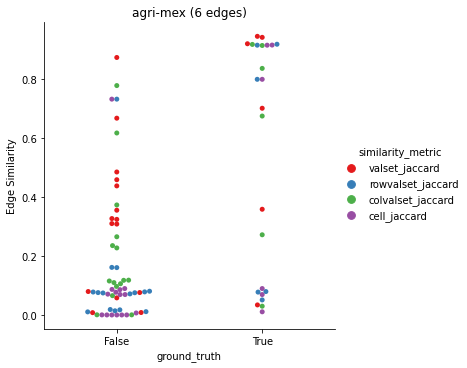

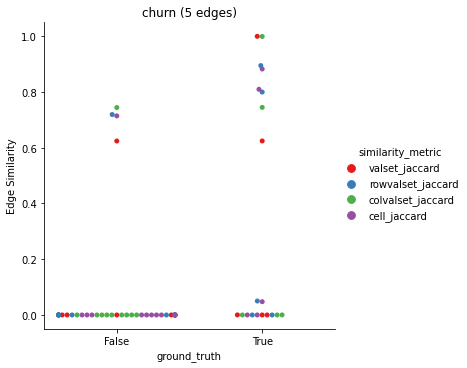

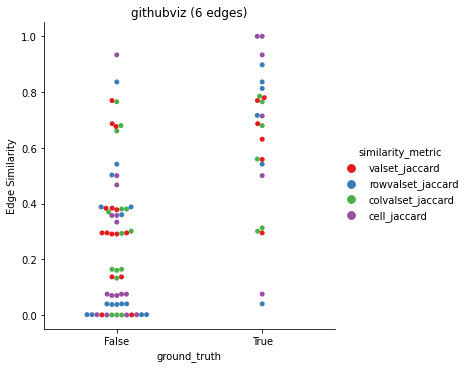

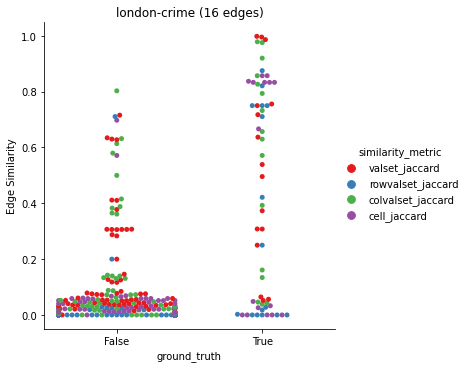

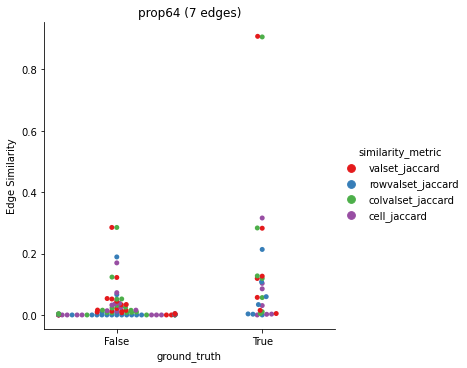

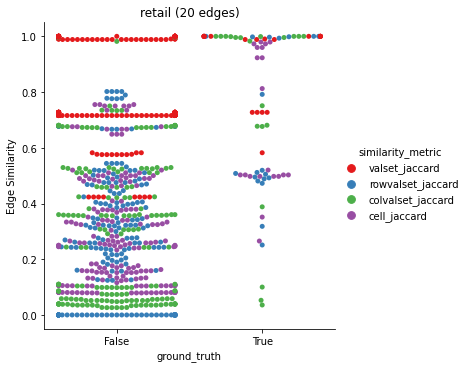

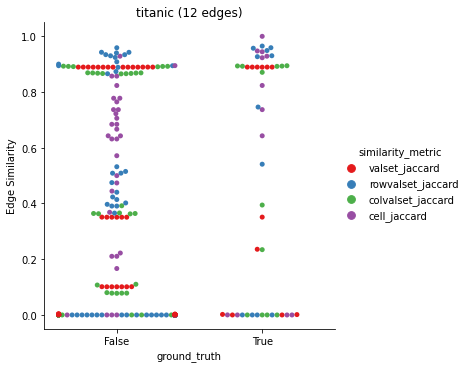

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
weights = ['valset_jaccard', 'rowvalset_jaccard', 'colvalset_jaccard', 'cell_jaccard']

for nb in notebooks:
    pairsdf = pd.read_csv(RESULT_DIR+nb+'/pairwise_metrics.csv', index_col=0).rename({'ivalset_jaccard': 'rowvalset_jaccard'}, axis=1)
    viz_df = pairsdf[weights+['ground_truth']].melt('ground_truth').rename({'variable': 'similarity_metric'}, axis=1)
    
    sns.catplot(x='ground_truth', y='value', data=viz_df, hue='similarity_metric', kind='swarm', palette='Set1', hue_order=weights)
    plt.ylabel('Edge Similarity')
    plt.title(nb+' ('+str(len(graphs.get_graph(RESULT_DIR, nb).edges()))+ ' edges)')
    #display(pairsdf)
    #
    #for weight in weights:
    #    sns.scatterplot(x='ground_truth', y=, data=top_vals, hue=weight)

    

In [27]:
pairsdf

,avg_containment,avg_contraction,cell_jaccard,col_jaccard,colvalset_jaccard,common_cols,dest,ground_truth,ivalset_jaccard,max_containment,max_contraction,min_containment,min_contraction,operation,source,unique_cols,valset_jaccard
0,0.982434,1.091861,0.069311,0.321177,0.364978,5,HSdf.csv,False,0.070572,1.000000,1.091861,0.912168,1.091861,NaN,AtlasHSWithMexMerge.csv,1,0.485371
1,0.996516,NaN,0.089652,0.692159,0.818618,9,AtlasHSWithMexMerge.csv,True,0.078521,1.000000,NaN,0.985205,NaN,merge,MexHS__1.csv,0,0.920744
2,0.333333,11.385321,0.010723,0.188688,0.025949,12,AtlasHS_WithNoMexican.csv,True,0.037043,1.000000,11.385321,0.000000,11.385321,isnull,AtlasHSWithMexMerge.csv,2,0.034084
3,1.000000,1.091861,0.069311,0.251610,0.259304,4,HSdf__1.csv,False,0.074259,1.000000,1.091861,1.000000,1.091861,NaN,AtlasHSWithMexMerge.csv,1,0.355616
4,1.000000,NaN,0.069311,0.333333,0.266130,4,AtlasHSWithMexMerge.csv,True,0.076485,1.000000,NaN,1.000000,NaN,merge,AtlasHS.csv,0,0.358867
5,0.907284,NaN,0.089646,0.619566,0.762018,9,MexHS.csv,False,0.077390,1.000000,NaN,0.500000,NaN,NaN,AtlasHSWithMexMerge.csv,0,0.874117
6,0.992602,1.179286,0.070664,0.139773,0.227259,2,MexHS__1.csv,False,0.160776,1.000000,1.179286,0.985205,1.179286,NaN,HSdf.csv,1,0.459118
7,0.800000,12.431193,0.000000,0.081785,0.054150,5,AtlasHS_WithNoMexican.csv,False,0.012653,1.000000,12.431193,0.000000,12.431193,NaN,HSdf.csv,2,0.058026
8,0.968750,NaN,0.800000,0.800000,0.670076,4,HSdf__1.csv,True,0.795759,1.000000,NaN,0.875000,NaN,filter,HSdf.csv,0,0.701759
9,1.000000,1.091861,0.732694,0.603864,0.615568,4,AtlasHS.csv,False,0.732694,1.000000,1.091861,1.000000,1.091861,NaN,HSdf.csv,1,0.668052


In [53]:
import math
nantups = [x for x in similarity.get_indexed_cellvalset(df_dict['users_ren_col.csv']) if type(x[2]) == float and math.isnan(x[2])]

In [55]:
math.isnan(nantups[0][2]) and math.isnan(nantups[1][2])

True

# GroupBy Testing

In [53]:
# Column Value containment

def col_containment(df1, df2, colname, col2name=None):
    if(col2name==None):
        col2name = colname

    df1valset = set(df1[colname])
    df2valset = set(df2[col2name])

    return len(df1valset.intersection(df2valset)) / len(df2valset)



In [59]:
df_dict['crimeTypes.csv']

,Crime type,Outcome Month,Outcome type,Crime Month,Area
0,Bicycle theft,8531,8531,8531,8531
1,Burglary,31245,31245,31245,31245
2,Criminal damage and arson,30280,30280,30280,30280
3,Drugs,31644,31644,31644,31644
4,Other crime,7205,7205,7205,7205
5,Other theft,62802,62802,62802,62802
6,Possession of weapons,3582,3582,3582,3582
7,Public order,32107,32107,32107,32107
8,Robbery,15617,15617,15617,15617
9,Shoplifting,36765,36765,36765,36765


In [62]:
col_containment(df_dict['crimes.csv'], df_dict['crimeTypes.csv'], 'Crime type')

1.0

In [8]:
import nppo

In [19]:
nppo.df_groupby_check_new(df_dict['crimes.csv'], df_dict['typeLoc.csv'])

2.0

In [70]:
components = [['MexHS.csv', 'MexHS__1.csv'], ['AtlasHS.csv', 'HSdf__1.csv', 'HSdf.csv'], ['AtlasHSWithMexMerge.csv'], ['AtlasHS_WithNoMexican.csv']]

components

[['MexHS.csv', 'MexHS__1.csv'],
 ['AtlasHS.csv', 'HSdf__1.csv', 'HSdf.csv'],
 ['AtlasHSWithMexMerge.csv'],
 ['AtlasHS_WithNoMexican.csv']]

In [69]:
import itertools
combos =  [[i for i in itertools.product(*c)] for c in itertools.combinations(components,3)]
set(item for sublist in combos for item in sublist)

{('AtlasHS.csv', 'AtlasHSWithMexMerge.csv', 'AtlasHS_WithNoMexican.csv'),
 ('HSdf.csv', 'AtlasHSWithMexMerge.csv', 'AtlasHS_WithNoMexican.csv'),
 ('HSdf__1.csv', 'AtlasHSWithMexMerge.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS.csv', 'AtlasHS.csv', 'AtlasHSWithMexMerge.csv'),
 ('MexHS.csv', 'AtlasHS.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS.csv', 'AtlasHSWithMexMerge.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS.csv', 'HSdf.csv', 'AtlasHSWithMexMerge.csv'),
 ('MexHS.csv', 'HSdf.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS.csv', 'HSdf__1.csv', 'AtlasHSWithMexMerge.csv'),
 ('MexHS.csv', 'HSdf__1.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS__1.csv', 'AtlasHS.csv', 'AtlasHSWithMexMerge.csv'),
 ('MexHS__1.csv', 'AtlasHS.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS__1.csv', 'AtlasHSWithMexMerge.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS__1.csv', 'HSdf.csv', 'AtlasHSWithMexMerge.csv'),
 ('MexHS__1.csv', 'HSdf.csv', 'AtlasHS_WithNoMexican.csv'),
 ('MexHS__1.csv', 'HSdf__1.csv', 'AtlasHSWit